# Tugas Besar Penambangan Data: Segmentasi dan Prediksi Kunjungan Wisatawan Nusantara

**Nama Kelompok:** [Isi Nama Kelompok]
**Anggota:** [Isi Nama Anggota]

## 1. Pendahuluan

Tugas besar ini bertujuan untuk menganalisis data perjalanan wisatawan nusantara di Indonesia. Analisis dibagi menjadi dua bagian utama:
1.  **Segmentasi Provinsi (Unsupervised Learning)**: Menggunakan algoritma K-Means Clustering untuk mengelompokkan provinsi berdasarkan pola perjalanan wisatawan.
2.  **Prediksi Kategori Kunjungan (Supervised Learning)**: Menggunakan algoritma Klasifikasi (Logistic Regression) untuk memprediksi kategori jumlah kunjungan.

*Output* akhir dari proyek ini adalah sebuah *dashboard* interaktif yang dibuat menggunakan Streamlit.


#### Import Library dan Dataset

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset.csv')


## Read Data

Membaca beberapa baris awal dataset

In [41]:
df.head(45)

,Provinsi,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Bulan13
0,Aceh,1081919,988563,977399,1312395,1056737,1121373,1011238,964321,1181744,1089633,1064882,1721624,13571828,NaN
1,Sumatera Utara,3934845,3404211,3151675,3460417,3441857,3372608,3408206,3372536,3907777,3338507,3282438,4169674,42244751,NaN
2,Sumatera Barat,1626935,1610621,1266491,1420310,1280094,1529458,1608782,1405802,1486716,1427075,1416489,1752083,17830856,NaN
3,Riau,1735350,1587588,1496958,2080509,1568369,1552621,1583629,1500973,1656622,1517565,1440675,1780158,19501017,NaN
4,Jambi,741052,675155,649798,954987,704969,719358,705689,683340,771634,767808,751904,998556,9124250,NaN
5,Sumatera Selatan,1580053,1398899,1350139,1869157,1438593,1470817,1449100,1438726,1639793,1635045,1587669,2062915,18920906,NaN
6,Bengkulu,369567,324525,309839,476760,353140,372200,388032,357207,389084,366633,363291,622945,4693223,NaN
7,Lampung,1713476,1469073,1392326,1729965,1608538,1710187,1546462,1435569,1576863,1539987,1518834,1993026,19234306,NaN
8,Kepulauan Bangka Belitung,268354,246245,237090,314904,256159,247359,268651,236385,298223,270903,268737,411036,3324046,NaN
9,Kepulauan Riau,275085,273861,266969,374769,267945,241744,264805,233950,280282,256292,250760,313316,3299778,NaN


## Melihat Informasi data


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Provinsi   38 non-null     object 
 1   Januari    38 non-null     int64  
 2   Februari   38 non-null     int64  
 3   Maret      38 non-null     int64  
 4   April      38 non-null     int64  
 5   Mei        38 non-null     int64  
 6   Juni       38 non-null     int64  
 7   Juli       38 non-null     int64  
 8   Agustus    38 non-null     int64  
 9   September  38 non-null     int64  
 10  Oktober    38 non-null     int64  
 11  November   38 non-null     int64  
 12  Desember   38 non-null     int64  
 13  Tahunan    38 non-null     int64  
 14  Bulan13    0 non-null      float64
dtypes: float64(1), int64(13), object(1)
memory usage: 4.6+ KB


## Data Cleansing
Melakukan pengecekan terhadap dataset

In [43]:
df.isnull().sum()

Provinsi      0
Januari       0
Februari      0
Maret         0
April         0
Mei           0
Juni          0
Juli          0
Agustus       0
September     0
Oktober       0
November      0
Desember      0
Tahunan       0
Bulan13      38
dtype: int64

### Deskripsi Data

In [44]:
df.describe()

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Bulan13
count,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,0.0
mean,2.381623e+06,2.134399e+06,2.077800e+06,2.750716e+06,2.181833e+06,2.196639e+06,2.032734e+06,1.996796e+06,2.193715e+06,2.142866e+06,2.121383e+06,2.660129e+06,2.687063e+07,NaN
std,4.245405e+06,3.827256e+06,3.696270e+06,5.090095e+06,3.923300e+06,4.017836e+06,3.576107e+06,3.460002e+06,3.782361e+06,3.774781e+06,3.774072e+06,4.540162e+06,4.758548e+07,NaN
min,2.909500e+04,2.138100e+04,2.139700e+04,2.463400e+04,2.019100e+04,1.380900e+04,1.659500e+04,1.286800e+04,1.277200e+04,1.200000e+04,1.212900e+04,2.810800e+04,2.249790e+05,NaN
25%,2.700368e+05,2.531490e+05,2.445598e+05,3.298702e+05,2.591055e+05,2.431478e+05,2.657665e+05,2.345588e+05,2.827152e+05,2.599448e+05,2.538025e+05,3.285085e+05,3.305845e+06,NaN
50%,8.280425e+05,7.382830e+05,7.223380e+05,1.000661e+06,7.457285e+05,7.429895e+05,7.319770e+05,6.765255e+05,7.615120e+05,7.331405e+05,7.195595e+05,9.842890e+05,9.170610e+06,NaN
75%,1.729882e+06,1.604863e+06,1.470800e+06,2.027671e+06,1.598496e+06,1.666316e+06,1.602494e+06,1.485411e+06,1.652415e+06,1.611280e+06,1.570460e+06,1.991570e+06,1.943434e+07,NaN
max,1.833181e+07,1.751869e+07,1.596342e+07,2.235086e+07,1.752880e+07,1.896227e+07,1.625585e+07,1.393134e+07,1.570090e+07,1.528823e+07,1.542826e+07,1.882563e+07,2.048828e+08,NaN


### Membuat visualisasi line chart

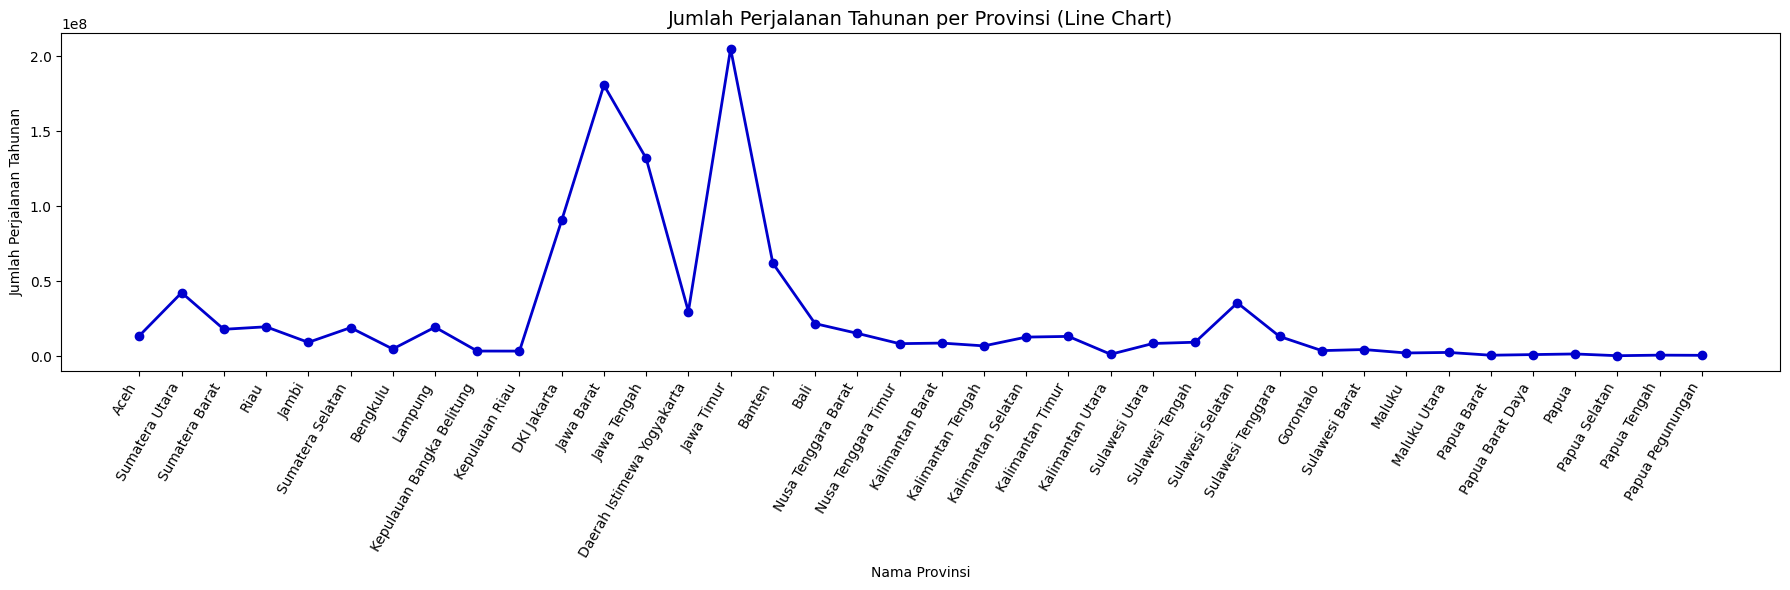

In [45]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18, 6))
plt.plot(df['Provinsi'], df['Tahunan'], marker='o', color='mediumblue', linewidth=2)

plt.xlabel('Nama Provinsi')
plt.ylabel('Jumlah Perjalanan Tahunan')
plt.title('Jumlah Perjalanan Tahunan per Provinsi (Line Chart)', fontsize=14)

plt.xticks(rotation=60, ha='right')

plt.grid(False)

plt.tight_layout()
plt.show()


## Unsupervised Learning

K - Means Clustering

Membaca data

In [46]:
df_kmeans = df.copy()

df_kmeans.head(8)

,Provinsi,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Bulan13
0,Aceh,1081919,988563,977399,1312395,1056737,1121373,1011238,964321,1181744,1089633,1064882,1721624,13571828,NaN
1,Sumatera Utara,3934845,3404211,3151675,3460417,3441857,3372608,3408206,3372536,3907777,3338507,3282438,4169674,42244751,NaN
2,Sumatera Barat,1626935,1610621,1266491,1420310,1280094,1529458,1608782,1405802,1486716,1427075,1416489,1752083,17830856,NaN
3,Riau,1735350,1587588,1496958,2080509,1568369,1552621,1583629,1500973,1656622,1517565,1440675,1780158,19501017,NaN
4,Jambi,741052,675155,649798,954987,704969,719358,705689,683340,771634,767808,751904,998556,9124250,NaN
5,Sumatera Selatan,1580053,1398899,1350139,1869157,1438593,1470817,1449100,1438726,1639793,1635045,1587669,2062915,18920906,NaN
6,Bengkulu,369567,324525,309839,476760,353140,372200,388032,357207,389084,366633,363291,622945,4693223,NaN
7,Lampung,1713476,1469073,1392326,1729965,1608538,1710187,1546462,1435569,1576863,1539987,1518834,1993026,19234306,NaN


Melihat kembali statistik dataset

In [47]:
df_kmeans.describe()

,Januari,Februari,Maret,April,Mei,Juni,Juli,Agustus,September,Oktober,November,Desember,Tahunan,Bulan13
count,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,3.800000e+01,0.0
mean,2.381623e+06,2.134399e+06,2.077800e+06,2.750716e+06,2.181833e+06,2.196639e+06,2.032734e+06,1.996796e+06,2.193715e+06,2.142866e+06,2.121383e+06,2.660129e+06,2.687063e+07,NaN
std,4.245405e+06,3.827256e+06,3.696270e+06,5.090095e+06,3.923300e+06,4.017836e+06,3.576107e+06,3.460002e+06,3.782361e+06,3.774781e+06,3.774072e+06,4.540162e+06,4.758548e+07,NaN
min,2.909500e+04,2.138100e+04,2.139700e+04,2.463400e+04,2.019100e+04,1.380900e+04,1.659500e+04,1.286800e+04,1.277200e+04,1.200000e+04,1.212900e+04,2.810800e+04,2.249790e+05,NaN
25%,2.700368e+05,2.531490e+05,2.445598e+05,3.298702e+05,2.591055e+05,2.431478e+05,2.657665e+05,2.345588e+05,2.827152e+05,2.599448e+05,2.538025e+05,3.285085e+05,3.305845e+06,NaN
50%,8.280425e+05,7.382830e+05,7.223380e+05,1.000661e+06,7.457285e+05,7.429895e+05,7.319770e+05,6.765255e+05,7.615120e+05,7.331405e+05,7.195595e+05,9.842890e+05,9.170610e+06,NaN
75%,1.729882e+06,1.604863e+06,1.470800e+06,2.027671e+06,1.598496e+06,1.666316e+06,1.602494e+06,1.485411e+06,1.652415e+06,1.611280e+06,1.570460e+06,1.991570e+06,1.943434e+07,NaN
max,1.833181e+07,1.751869e+07,1.596342e+07,2.235086e+07,1.752880e+07,1.896227e+07,1.625585e+07,1.393134e+07,1.570090e+07,1.528823e+07,1.542826e+07,1.882563e+07,2.048828e+08,NaN


## Pre Modelling


Menentukan K (Jumlah cluster optimal)

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Melakukan labelling 


In [49]:
features = df.drop('Provinsi', axis=1)

Standarisasi data

In [50]:
scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)

print("\nContoh Data Setelah Scaling:")
print(features_scaled[:5])


Contoh Data Setelah Scaling:
[[-0.31025314 -0.30340726 -0.30170193 -0.28636562 -0.29062237 -0.27121559
  -0.28947885 -0.30240864 -0.2711416  -0.28276356 -0.2836944  -0.20948651
  -0.28322337         nan]
 [ 0.37077067  0.33623485  0.29442932  0.14129942  0.32547538  0.29661602
   0.38979142  0.40294984  0.4592555   0.32099636  0.31176946  0.33695025
   0.32742114         nan]
 [-0.18015202 -0.13869183 -0.22244025 -0.26488005 -0.23292727 -0.16828384
  -0.12014248 -0.17310026 -0.18942921 -0.1921698  -0.18927998 -0.20268767
  -0.19251926         nan]
 [-0.15427221 -0.14479077 -0.15925205 -0.13343631 -0.15846327 -0.16244141
  -0.12727052 -0.14522498 -0.14390561 -0.16787576 -0.18278549 -0.19642096
  -0.15695            nan]
 [-0.39162173 -0.38639491 -0.3915218  -0.35752453 -0.38148718 -0.3726163
  -0.37606756 -0.38470707 -0.38102404 -0.36916459 -0.36773606 -0.37088474
  -0.37794302         nan]]


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Membuat elbow method untuk menentukan jumlah kluster optimal

Kolom yang digunakan untuk clustering:
['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember', 'Tahunan']
Shape data: (38, 13)


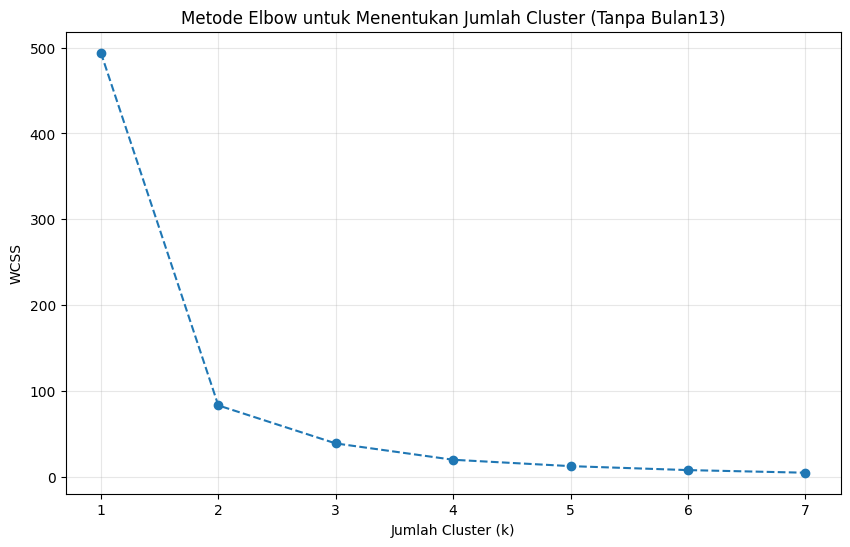

WCSS values:
k=1: 494.00
k=2: 83.33
k=3: 39.06
k=4: 20.03
k=5: 12.62
k=6: 8.00
k=7: 4.94


In [51]:
# Modified Elbow Method Code - Tanpa Bulan13
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('dataset.csv')

# Drop kolom Provinsi dan Bulan13 untuk analisis clustering
features = df.drop(['Provinsi', 'Bulan13'], axis=1)

# Standarisasi data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print("Kolom yang digunakan untuk clustering:")
print(features.columns.tolist())
print(f"Shape data: {features.shape}")

# Metode Elbow untuk menentukan jumlah cluster optimal
wcss = [] 
for i in range(1, 8): 
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 8), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster (Tanpa Bulan13)')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True, alpha=0.3)
plt.show()

print("WCSS values:")
for i, wcss_val in enumerate(wcss, 1):
    print(f"k={i}: {wcss_val:.2f}") 

Membuat visualisasi kluster

In [52]:
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)

cluster_labels = kmeans.fit_predict(features_scaled)

df['Cluster'] = cluster_labels

print("\nHasil Clustering:")
print(df[['Provinsi', 'Cluster']].sort_values('Cluster'))


Hasil Clustering:
                      Provinsi  Cluster
0                         Aceh        0
21          Kalimantan Selatan        0
22            Kalimantan Timur        0
23            Kalimantan Utara        0
24              Sulawesi Utara        0
25             Sulawesi Tengah        0
26            Sulawesi Selatan        0
27           Sulawesi Tenggara        0
28                   Gorontalo        0
29              Sulawesi Barat        0
30                      Maluku        0
31                Maluku Utara        0
32                 Papua Barat        0
33            Papua Barat Daya        0
34                       Papua        0
35               Papua Selatan        0
20           Kalimantan Tengah        0
19            Kalimantan Barat        0
18         Nusa Tenggara Timur        0
17         Nusa Tenggara Barat        0
1               Sumatera Utara        0
2               Sumatera Barat        0
3                         Riau        0
4                    

Membuat visualisasi cluster

C:\Users\DELL\AppData\Local\Temp\ipykernel_16060\3731430902.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_plot, x='Bulan', y='Nilai', hue='Cluster', palette='viridis', ci=None, estimator='mean', legend='full', lw=3)


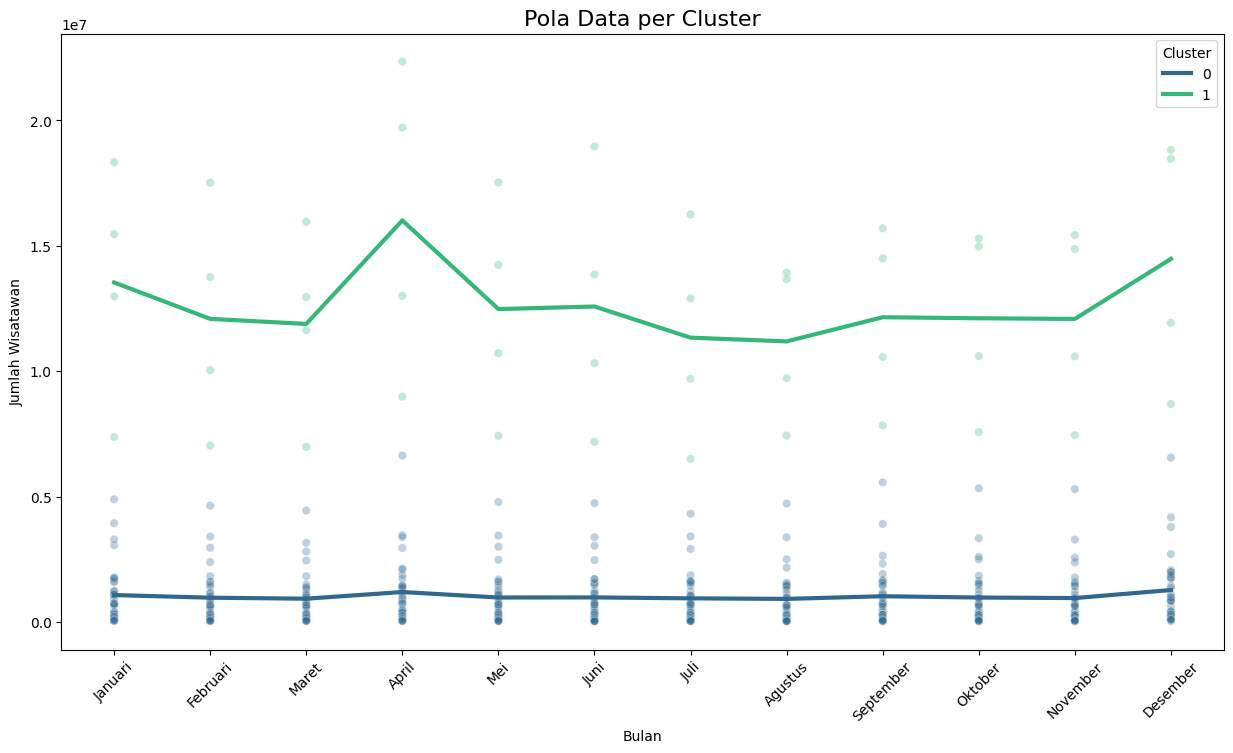


--- Cluster 0 ---
Anggota: ['Aceh', 'Sumatera Utara', 'Sumatera Barat', 'Riau', 'Jambi', 'Sumatera Selatan', 'Bengkulu', 'Lampung', 'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Daerah Istimewa Yogyakarta', 'Banten', 'Bali', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Kalimantan Barat', 'Kalimantan Tengah', 'Kalimantan Selatan', 'Kalimantan Timur', 'Kalimantan Utara', 'Sulawesi Utara', 'Sulawesi Tengah', 'Sulawesi Selatan', 'Sulawesi Tenggara', 'Gorontalo', 'Sulawesi Barat', 'Maluku', 'Maluku Utara', 'Papua Barat', 'Papua Barat Daya', 'Papua', 'Papua Selatan', 'Papua Tengah', 'Papua Pegunungan']

--- Cluster 1 ---
Anggota: ['DKI Jakarta', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur']


In [53]:
df_plot = df.melt(id_vars=['Provinsi', 'Cluster'], var_name='Bulan', value_name='Nilai')

bulan_urutan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
df_plot['Bulan'] = pd.Categorical(df_plot['Bulan'], categories=bulan_urutan, ordered=True)

plt.figure(figsize=(15, 8))
sns.lineplot(data=df_plot, x='Bulan', y='Nilai', hue='Cluster', palette='viridis', ci=None, estimator='mean', legend='full', lw=3)

sns.scatterplot(data=df_plot, x='Bulan', y='Nilai', hue='Cluster', palette='viridis', legend=False, alpha=0.3)

plt.title('Pola Data per Cluster', fontsize=16)
plt.ylabel('Jumlah Wisatawan')
plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.show()

for i in range(k):
    print(f"\n--- Cluster {i} ---")
    print("Anggota:", list(df[df['Cluster'] == i]['Provinsi']))

Menghitung Silhoutte score


Untuk k=2, Silhouette Score adalah: 0.8467
Untuk k=3, Silhouette Score adalah: 0.7947
Untuk k=4, Silhouette Score adalah: 0.6793
Untuk k=5, Silhouette Score adalah: 0.5636
Untuk k=6, Silhouette Score adalah: 0.5745
Untuk k=7, Silhouette Score adalah: 0.5502


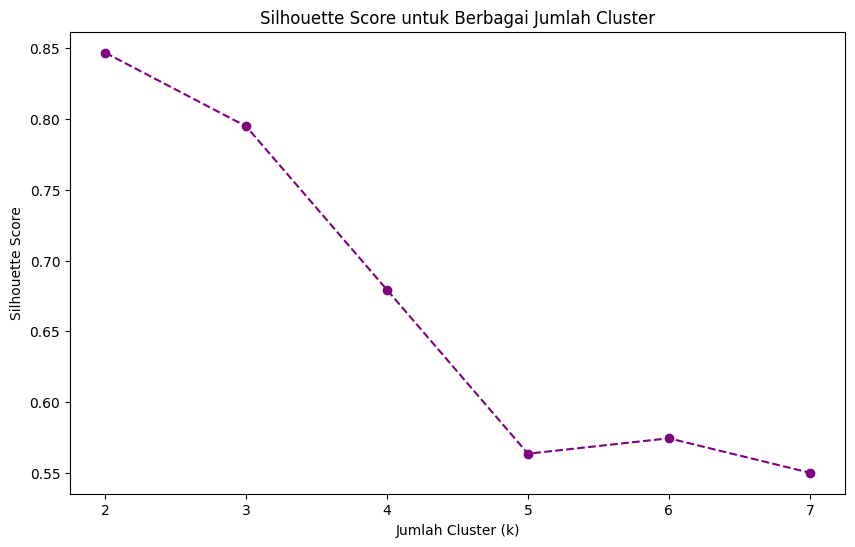

In [54]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 8):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(features_scaled)
    
    labels = kmeans.labels_
    
    score = silhouette_score(features_scaled, labels)
    silhouette_scores.append(score)
    print(f"Untuk k={i}, Silhouette Score adalah: {score:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(2, 8), silhouette_scores, marker='o', linestyle='--', color='purple')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.show()

### Model Tuning

Melakukan tuning model dengan melakukan pemilihan terhadap hyperparameter secara otomatis menggunakan Grid Search

Dilakukan untuk mengetahui nilai mana yang harus ditetapkan untuk parameter yang dicari memerlukan kombinasi pengetahuan dan praktik domain.

Import library yang digunakan


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

Penentuan parameter, bagian ini akan membuat list nilai n_init, n_cluster, max_iter, dan init pada param_grid


In [56]:
param_grid = {
    'n_init': [10, 20], 
    'n_clusters': [2, 3, 4, 5], 
    'max_iter': [300, 500],
    'init': ['k-means++', 'random'] 
}

def safe_silhouette_scorer(estimator, X):
    try:
        labels = estimator.fit_predict(X)
        n_clusters = len(np.unique(labels))
        n_samples = X.shape[0]
        
        if n_clusters >= n_samples or n_clusters < 2:
            return -1
        
        return silhouette_score(X, labels)
    except:
        return -1

Inisialisasi K - Means

In [57]:
def manual_kmeans_tuning(X, param_grid):
    best_score = -1
    best_params = None
    results = []
    
    for n_clusters in param_grid['n_clusters']:
        for n_init in param_grid['n_init']:
            for max_iter in param_grid['max_iter']:
                for init in param_grid['init']:
                    try:
                        kmeans = KMeans(
                            n_clusters=n_clusters,
                            n_init=n_init,
                            max_iter=max_iter,
                            init=init,
                            random_state=0
                        )
                        labels = kmeans.fit_predict(X)
                        score = silhouette_score(X, labels)
                        
                        params = {'n_clusters': n_clusters, 'n_init': n_init, 
                                 'max_iter': max_iter, 'init': init}
                        
                        results.append({'params': params, 'score': score})
                        
                        if score > best_score:
                            best_score = score
                            best_params = params
                            
                    except Exception as e:
                        print(f"Error dengan parameter {params}: {e}")
                        continue
    
    return best_params, best_score, results

best_params, best_score, all_results = manual_kmeans_tuning(features_scaled, param_grid)
print(f"Parameter Terbaik: {best_params}")
print(f"Silhouette Score: {best_score:.4f}")

Parameter Terbaik: {'n_clusters': 2, 'n_init': 10, 'max_iter': 300, 'init': 'k-means++'}
Silhouette Score: 0.8467


## **Modeling**

Bangun model klasifikasi Logistic Regression
Bagi dataset menjadi data latih dan data uji
Evaluasi performa model (akurasi, precision, recall, dll)

Melakukan import library


In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

Menentukan fitur dan target

In [59]:
bins = [0, 10000000, 50000000, df['Tahunan'].max()]
labels = ['Rendah', 'Sedang', 'Tinggi']
df['Kategori_Kunjungan'] = pd.cut(df['Tahunan'], bins=bins, labels=labels, include_lowest=True)
columns_to_drop = ['Provinsi', 'Tahunan', 'Kategori_Kunjungan']

if 'Bulan13' in df.columns:
    columns_to_drop.append('Bulan13')
X = df.drop(columns_to_drop, axis=1)
y = df['Kategori_Kunjungan']


Membagi dan melatih model

In [60]:
# Simple Logistic Regression - Tanpa Bulan13
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
df = pd.read_csv('dataset.csv')

print("=== INFO DATASET ===")
print(f"Shape: {df.shape}")
print(f"Kolom: {df.columns.tolist()}")

bins = [0, 10000000, 50000000, df['Tahunan'].max()]
labels = ['Rendah', 'Sedang', 'Tinggi']
df['Kategori_Kunjungan'] = pd.cut(df['Tahunan'], bins=bins, labels=labels, include_lowest=True)

print(f"\nDistribusi kategori:")
print(df['Kategori_Kunjungan'].value_counts())

monthly_columns = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                  'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

X = df[monthly_columns]
y = df['Kategori_Kunjungan']

print(f"\n=== DATA PREPARATION ===")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")
print(f"Kolom features: {X.columns.tolist()}")

print(f"\nMissing values di X: {X.isnull().sum().sum()}")
print(f"Missing values di y: {y.isnull().sum()}")

if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    print("Menghapus baris dengan missing values...")
    # Hapus baris yang memiliki missing values di X atau y
    valid_indices = ~(X.isnull().any(axis=1) | y.isnull())
    X = X[valid_indices]
    y = y[valid_indices]
    print(f"Shape setelah cleaning - X: {X.shape}, y: {y.shape}")

print(f"\nVerifikasi:")
print(f"X samples: {len(X)}")
print(f"y samples: {len(y)}")
assert len(X) == len(y), "Jumlah sampel X dan y tidak sama!"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n=== DATA SPLIT ===")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

print(f"\n=== TRAINING MODEL ===")
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\n=== HASIL EVALUASI ===")
print(f"Akurasi: {accuracy:.2%}")
print(f"Data training: {len(X_train)}")
print(f"Data test: {len(X_test)}")

print(f"\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred))

print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print(f"\n=== CONTOH PREDIKSI ===")
if len(X_test) > 0:
    sample_data = X_test.iloc[0:min(3, len(X_test))]
    predictions = logreg_model.predict(sample_data)
    probabilities = logreg_model.predict_proba(sample_data)

    for i, (pred, prob) in enumerate(zip(predictions, probabilities)):
        print(f"Sample {i+1}: {pred} - Prob: {prob}")
else:
    print("Tidak ada data test untuk prediksi") 

=== INFO DATASET ===
Shape: (38, 15)
Kolom: ['Provinsi', 'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember', 'Tahunan', 'Bulan13']

Distribusi kategori:
Kategori_Kunjungan
Rendah    20
Sedang    13
Tinggi     5
Name: count, dtype: int64

=== DATA PREPARATION ===
Features (X): (38, 12)
Target (y): (38,)
Kolom features: ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

Missing values di X: 0
Missing values di y: 0

Verifikasi:
X samples: 38
y samples: 38

=== DATA SPLIT ===
X_train: (30, 12)
X_test: (8, 12)
y_train: (30,)
y_test: (8,)

=== TRAINING MODEL ===

=== HASIL EVALUASI ===
Akurasi: 62.50%
Data training: 30
Data test: 8

Laporan Klasifikasi:
              precision    recall  f1-score   support

      Rendah       0.60      0.75      0.67         4
      Sedang       0.50      0.33      0.40         3
      Tinggi       1.00      1.00  

Melakukan Cross Validation

=== HASIL CROSS VALIDATION ===
Cross-validation scores: [0.75       0.625      0.625      0.57142857 0.71428571]
Rata-rata CV score: 0.657
Standar deviasi CV score: 0.065
Range CV score: 0.657 (+/- 0.131)


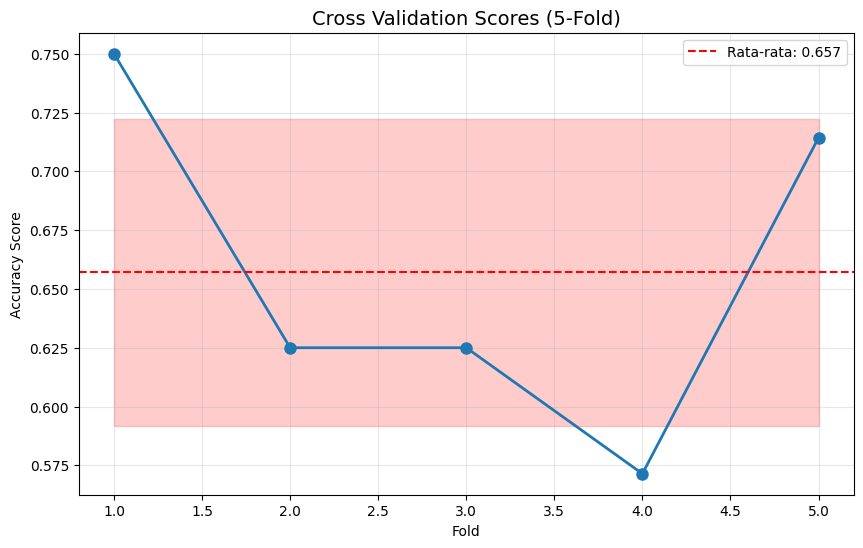

In [61]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(logreg_model, X, y, cv=5, scoring='accuracy')

print("=== HASIL CROSS VALIDATION ===")
print(f"Cross-validation scores: {cv_scores}")
print(f"Rata-rata CV score: {cv_scores.mean():.3f}")
print(f"Standar deviasi CV score: {cv_scores.std():.3f}")
print(f"Range CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), cv_scores, marker='o', linestyle='-', linewidth=2, markersize=8)
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', label=f'Rata-rata: {cv_scores.mean():.3f}')
plt.fill_between(range(1, 6), cv_scores.mean() - cv_scores.std(), 
                cv_scores.mean() + cv_scores.std(), alpha=0.2, color='red')
plt.title('Cross Validation Scores (5-Fold)', fontsize=14)
plt.xlabel('Fold')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Memprediksi dan evaluasi model

In [62]:
y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\n--- Ulasan Performa Model Klasifikasi ---")
print(f"\nAkurasi Model: {accuracy:.2f} ({accuracy*100:.2f}%)")

print("\nLaporan Klasifikasi Lengkap:")
print(class_report)

print("\n(Confusion Matrix):")
print(conf_matrix)


--- Ulasan Performa Model Klasifikasi ---

Akurasi Model: 0.62 (62.50%)

Laporan Klasifikasi Lengkap:
              precision    recall  f1-score   support

      Rendah       0.60      0.75      0.67         4
      Sedang       0.50      0.33      0.40         3
      Tinggi       1.00      1.00      1.00         1

    accuracy                           0.62         8
   macro avg       0.70      0.69      0.69         8
weighted avg       0.61      0.62      0.61         8


(Confusion Matrix):
[[3 1 0]
 [2 1 0]
 [0 0 1]]


Feature Importance

=== FEATURE IMPORTANCE LOGISTIC REGRESSION ===
      Feature  Importance
6        Juli    0.001749
7     Agustus    0.001653
5        Juni    0.001629
0     Januari    0.000928
11   Desember    0.000808
10   November    0.000756
9     Oktober    0.000489
8   September    0.000419
4         Mei    0.000346
2       Maret    0.000148
3       April    0.000056
1    Februari    0.000045


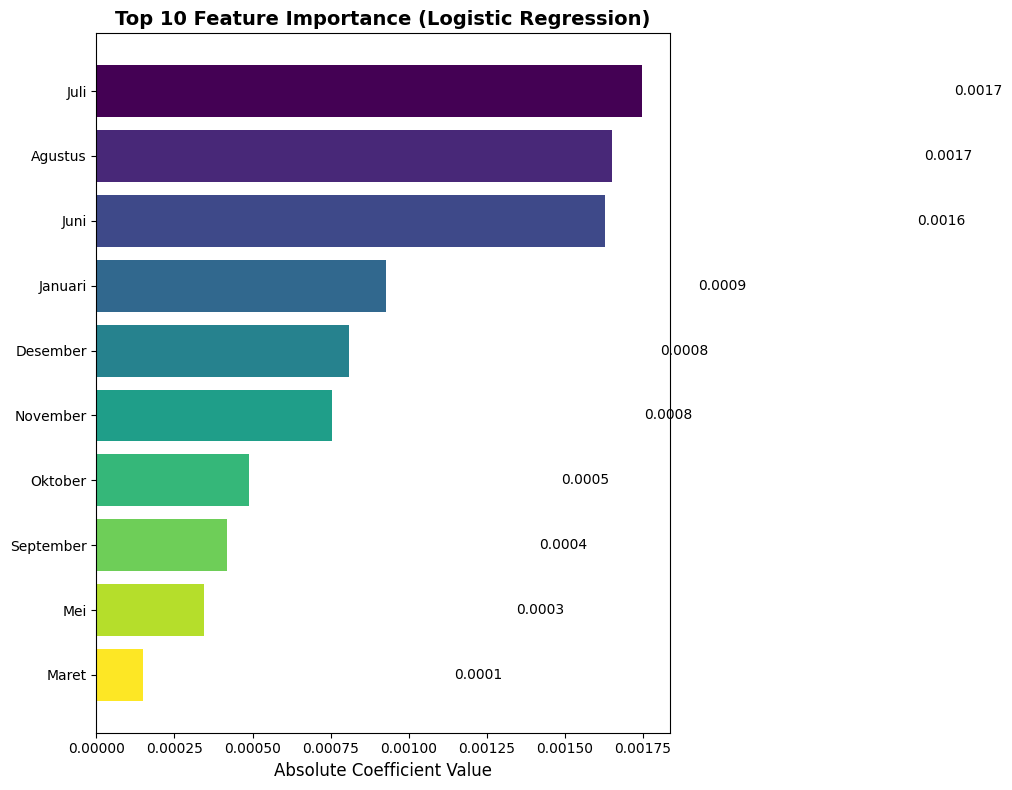


=== ANALISIS BULANAN BERDASARKAN IMPORTANCE ===
Urutan bulan berdasarkan importance:
Juli: 0.0017
Agustus: 0.0017
Juni: 0.0016
Januari: 0.0009
Desember: 0.0008
November: 0.0008
Oktober: 0.0005
September: 0.0004
Mei: 0.0003
Maret: 0.0001
April: 0.0001
Februari: 0.0000


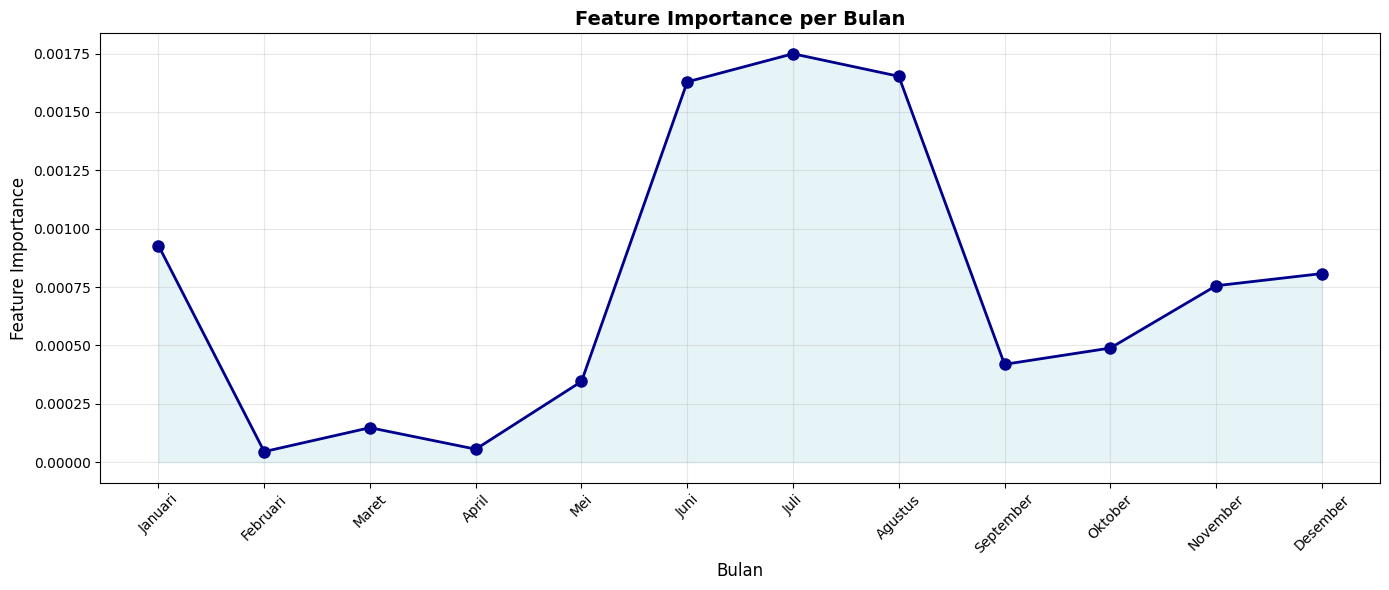

In [63]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(logreg_model.coef_[0])
}).sort_values('Importance', ascending=False)

print("=== FEATURE IMPORTANCE LOGISTIC REGRESSION ===")
print(feature_importance)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(10)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_features)))

bars = plt.barh(top_features['Feature'], top_features['Importance'], color=colors)
plt.xlabel('Absolute Coefficient Value', fontsize=12)
plt.title('Top 10 Feature Importance (Logistic Regression)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n=== ANALISIS BULANAN BERDASARKAN IMPORTANCE ===")
monthly_importance = feature_importance[feature_importance['Feature'].isin([
    'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
    'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'
])]

print("Urutan bulan berdasarkan importance:")
for idx, row in monthly_importance.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

plt.figure(figsize=(14, 6))
monthly_importance_sorted = monthly_importance.sort_values('Feature', key=lambda x: pd.Categorical(x, categories=[
    'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
    'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'
], ordered=True))

plt.plot(monthly_importance_sorted['Feature'], monthly_importance_sorted['Importance'], 
         marker='o', linewidth=2, markersize=8, color='darkblue')
plt.fill_between(monthly_importance_sorted['Feature'], monthly_importance_sorted['Importance'], 
                alpha=0.3, color='lightblue')
plt.title('Feature Importance per Bulan', fontsize=14, fontweight='bold')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Feature Importance', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Estimasi wisatawan untuk bulan ke - 13

In [64]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

st.set_page_config(
    page_title="Dashboard Analisis Wisatawan Nusantara",
    page_icon="🏝️",
    layout="wide",
    initial_sidebar_state="expanded"
)

st.markdown("""
<style>
    .main-header {
        font-size: 2.5rem;
        color: #1f77b4;
        text-align: center;
        margin-bottom: 2rem;
    }
    .metric-card {
        background-color: #fffbe6 !important;  
        color: #222 !important;               
        font-size: 1.3rem;
        font-weight: bold;
        border-left: 4px solid #f7b731;
        margin-bottom: 1rem;
    }
    .cluster-info {
           background-color: #e8f4fd;
           color: #111 !important;
           padding: 1rem;
           border-radius: 0.5rem;
           margin: 1rem 0;
    }
</style>
""", unsafe_allow_html=True)

@st.cache_data
def load_data():
    """Load and cache the dataset"""
    try:
        df = pd.read_csv('dataset.csv')
        
        if 'Bulan13' not in df.columns:
            df['Bulan13'] = np.nan
            df.to_csv('dataset.csv', index=False)
            st.sidebar.success("✅ Kolom 'Bulan13' berhasil ditambahkan ke dataset!")
        
        return df
    except FileNotFoundError:
        st.error("File dataset.csv tidak ditemukan! Pastikan file berada di direktori yang sama dengan app.py")
        return None

@st.cache_resource
def train_clustering_model(df):
    """Train K-Means clustering model"""
    features = df.drop('Provinsi', axis=1)
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(features_scaled)
    
    return kmeans, scaler, cluster_labels

@st.cache_resource
def train_classification_model(df):
    """Train Logistic Regression model"""
    bins = [0, 10000000, 50000000, df['Tahunan'].max()]
    labels = ['Rendah', 'Sedang', 'Tinggi']
    df['Kategori_Kunjungan'] = pd.cut(df['Tahunan'], bins=bins, labels=labels, include_lowest=True)
    
    X = df.drop(['Provinsi', 'Tahunan', 'Kategori_Kunjungan'], axis=1)
    y = df['Kategori_Kunjungan']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    logreg_model = LogisticRegression(max_iter=1000, random_state=42)
    logreg_model.fit(X_train, y_train)
    
    return logreg_model, X_test, y_test

def predict_bulan13_model(df):
    if 'Bulan13' not in df.columns:
        return None, None
    
    if df['Bulan13'].notna().sum() > 0:
        X = df[['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']]
        y = df['Bulan13'].dropna()  
        X = X.loc[y.index]  
        
        if len(y) > 0:
            model = LinearRegression()
            model.fit(X, y)
            return model, X.columns.tolist(), 'actual'
    

    monthly_cols = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                   'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

    monthly_avg = df[monthly_cols].mean()
    np.random.seed(42) 
    synthetic_bulan13 = monthly_avg.mean() * (0.8 + 0.4 * np.random.rand(len(df)))
    
    X = df[monthly_cols]
    y = synthetic_bulan13
    
    model = LinearRegression()
    model.fit(X, y)
    return model, monthly_cols, 'dummy'

def main():

    st.markdown('<h1 class="main-header">🏝️ Dashboard Analisis Wisatawan Nusantara</h1>', unsafe_allow_html=True)
    st.markdown("### Segmentasi Provinsi & Prediksi Kategori Kunjungan")
    

    df = load_data()
    if df is None:
        return

    st.sidebar.title("📊 Menu Navigasi")
    page = st.sidebar.selectbox(
        "Pilih Halaman:",
        ["🏠 Dashboard Utama", "📈 Data Overview", "🎯 Clustering Analysis", "🔮 Prediction Model", "📅 Prediksi Bulan ke-13", "📊 Visualizations"]
    )
    
    if page == "🏠 Dashboard Utama":
        show_dashboard(df)
    elif page == "📈 Data Overview":
        show_data_overview(df)
    elif page == "🎯 Clustering Analysis":
        show_clustering_analysis(df)
    elif page == "🔮 Prediction Model":
        show_prediction_model(df)
    elif page == "📅 Prediksi Bulan ke-13":
        show_predict_bulan13(df)
    elif page == "📊 Visualizations":
        show_visualizations(df)

def show_dashboard(df):
    """Main dashboard page"""
    st.markdown("## 📊 Dashboard Utama")
    

    col1, col2, col3, col4 = st.columns(4)
    
    with col1:
        st.metric("Total Provinsi", len(df))
    
    with col2:
        st.metric("Total Kunjungan Tahunan", f"{df['Tahunan'].sum():,}")
    
    with col3:
        st.metric("Rata-rata Kunjungan", f"{df['Tahunan'].mean():,.0f}")
    
    with col4:
        st.metric("Provinsi Tertinggi", df.loc[df['Tahunan'].idxmax(), 'Provinsi'])
    
    st.markdown("### 🏆 Top 10 Provinsi dengan Kunjungan Tertinggi")
    
    top_10 = df.nlargest(10, 'Tahunan')
    fig = px.bar(
        top_10, 
        x='Provinsi', 
        y='Tahunan',
        title="Top 10 Provinsi dengan Kunjungan Tertinggi",
        color='Tahunan',
        color_continuous_scale='viridis'
    )
    fig.update_layout(xaxis_tickangle=-45)
    st.plotly_chart(fig, use_container_width=True)
    
    st.markdown("### 📅 Pola Kunjungan Bulanan")
    
    monthly_data = df[['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                      'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']].mean()
    
    fig = px.line(
        x=monthly_data.index,
        y=monthly_data.values,
        title="Rata-rata Kunjungan Bulanan",
        markers=True
    )
    fig.update_layout(xaxis_title="Bulan", yaxis_title="Rata-rata Kunjungan")
    st.plotly_chart(fig, use_container_width=True)

def show_data_overview(df):
    """Data overview page"""
    st.markdown("## 📈 Data Overview")
    
    col1, col2 = st.columns(2)
    
    with col1:
        st.markdown("### 📋 Informasi Dataset")
        st.write(f"**Jumlah Baris:** {len(df)}")
        st.write(f"**Jumlah Kolom:** {len(df.columns)}")
        st.write(f"**Ukuran Dataset:** {df.shape}")
        
        st.markdown("### 🔧 Tipe Data")
        st.dataframe(df.dtypes.to_frame('Tipe Data'))
    
    with col2:
        st.markdown("### 📊 Statistik Deskriptif")
        st.dataframe(df.describe())
    
    st.markdown("### ❓ Missing Values")
    missing_data = df.isnull().sum()
    if missing_data.sum() == 0:
        st.success("✅ Tidak ada missing values dalam dataset!")
    else:
        st.warning("⚠️ Terdapat missing values:")
        st.dataframe(missing_data[missing_data > 0])
    
    st.markdown("### 📄 Data Mentah")
    st.dataframe(df)

def show_clustering_analysis(df):
    """Clustering analysis page"""
    st.markdown("## 🎯 Analisis Clustering (K-Means)")
    
    kmeans, scaler, cluster_labels = train_clustering_model(df)
    df_clustered = df.copy()
    df_clustered['Cluster'] = cluster_labels
    
    st.markdown("### 🎨 Hasil Clustering")
    
    col1, col2 = st.columns(2)
    
    with col1:
        st.markdown("#### 📊 Distribusi Cluster")
        cluster_counts = df_clustered['Cluster'].value_counts().sort_index()
        fig = px.pie(
            values=cluster_counts.values,
            names=[f'Cluster {i}' for i in cluster_counts.index],
            title="Distribusi Provinsi per Cluster"
        )
        st.plotly_chart(fig, use_container_width=True)
    
    with col2:
        st.markdown("#### 📈 Statistik per Cluster")
        cluster_stats = df_clustered.groupby('Cluster')['Tahunan'].agg(['mean', 'min', 'max', 'count'])
        cluster_stats.columns = ['Rata-rata', 'Minimum', 'Maksimum', 'Jumlah Provinsi']
        st.dataframe(cluster_stats)
    
    st.markdown("### 🔍 Detail Provinsi per Cluster")
    
    for cluster_id in sorted(df_clustered['Cluster'].unique()):
        cluster_provinces = df_clustered[df_clustered['Cluster'] == cluster_id]['Provinsi'].tolist()
        st.markdown(f"""
        <div class="cluster-info">
        <h4>Cluster {cluster_id}</h4>
        <p><strong>Jumlah Provinsi:</strong> {len(cluster_provinces)}</p>
        <p><strong>Provinsi:</strong> {', '.join(cluster_provinces)}</p>
        </div>
        """, unsafe_allow_html=True)
    
    st.markdown("### 📊 Visualisasi Cluster")
    
    monthly_cols = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                   'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
    
    cluster_monthly = df_clustered.groupby('Cluster')[monthly_cols].mean()
    
    fig = go.Figure()
    for cluster_id in cluster_monthly.index:
        fig.add_trace(go.Scatter(
            x=monthly_cols,
            y=cluster_monthly.loc[cluster_id],
            mode='lines+markers',
            name=f'Cluster {cluster_id}',
            line=dict(width=3)
        ))
    
    fig.update_layout(
        title="Pola Kunjungan Bulanan per Cluster",
        xaxis_title="Bulan",
        yaxis_title="Rata-rata Kunjungan",
        xaxis_tickangle=-45
    )
    st.plotly_chart(fig, use_container_width=True)

def show_prediction_model(df):
    """Prediction model page"""
    st.markdown("## 🔮 Model Prediksi Kategori Kunjungan")
    
    if 'Kategori_Kunjungan' not in df.columns:
        bins = [0, 10000000, 50000000, df['Tahunan'].max()]
        labels = ['Rendah', 'Sedang', 'Tinggi']
        df['Kategori_Kunjungan'] = pd.cut(df['Tahunan'], bins=bins, labels=labels, include_lowest=True)
    
    logreg_model, X_test, y_test = train_classification_model(df)
    
    st.markdown("### 📊 Performa Model")
    
    y_pred = logreg_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    col1, col2, col3 = st.columns(3)
    
    with col1:
        st.metric("Akurasi Model", f"{accuracy:.2%}")
    
    with col2:
        st.metric("Jumlah Data Test", len(X_test))
    
    with col3:
        st.metric("Jumlah Kategori", len(df['Kategori_Kunjungan'].unique()))
    

    st.markdown("### 📋 Laporan Klasifikasi")
    class_report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(class_report).transpose()
    st.dataframe(report_df)
    

    st.markdown("### 🎯 Confusion Matrix")
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fig = px.imshow(
        conf_matrix,
        text_auto=True,
        aspect="auto",
        title="Confusion Matrix",
        labels=dict(x="Predicted", y="Actual", color="Count"),
        x=['Rendah', 'Sedang', 'Tinggi'],
        y=['Rendah', 'Sedang', 'Tinggi']
    )
    st.plotly_chart(fig, use_container_width=True)
    

    st.markdown("### 🔮 Prediksi Kategori Kunjungan")
    st.markdown("Masukkan data bulanan untuk memprediksi kategori kunjungan:")
    
    col1, col2, col3 = st.columns(3)
    
    with col1:
        januari = st.number_input("Januari", min_value=0, value=1000000)
        februari = st.number_input("Februari", min_value=0, value=1000000)
        maret = st.number_input("Maret", min_value=0, value=1000000)
        april = st.number_input("April", min_value=0, value=1000000)
    
    with col2:
        mei = st.number_input("Mei", min_value=0, value=1000000)
        juni = st.number_input("Juni", min_value=0, value=1000000)
        juli = st.number_input("Juli", min_value=0, value=1000000)
        agustus = st.number_input("Agustus", min_value=0, value=1000000)
    
    with col3:
        september = st.number_input("September", min_value=0, value=1000000)
        oktober = st.number_input("Oktober", min_value=0, value=1000000)
        november = st.number_input("November", min_value=0, value=1000000)
        desember = st.number_input("Desember", min_value=0, value=1000000)
    
    if st.button("🔮 Prediksi Kategori"):

        input_data = np.array([januari, februari, maret, april, mei, juni, 
                              juli, agustus, september, oktober, november, desember]).reshape(1, -1)
        

        prediction = logreg_model.predict(input_data)[0]
        probability = logreg_model.predict_proba(input_data)[0]
        
        st.markdown("### 📊 Hasil Prediksi")
        
        col1, col2 = st.columns(2)
        
        with col1:
            st.markdown(f"""
            <div class="metric-card">
            <h3>Kategori Prediksi: {prediction}</h3>
            </div>
            """, unsafe_allow_html=True)
        
        with col2:
            st.markdown("**Probabilitas per Kategori:**")
            categories = ['Rendah', 'Sedang', 'Tinggi']
            for cat, prob in zip(categories, probability):
                st.write(f"{cat}: {prob:.2%}")

def show_predict_bulan13(df):
    st.markdown("## 📅 Prediksi Bulan ke-13 (Regresi)")
    st.markdown("Masukkan data 12 bulan untuk memprediksi nilai bulan ke-13 menggunakan Linear Regression.")

    model, bulan_cols, data_type = predict_bulan13_model(df)
    if model is None:
        st.warning("Dataset tidak memiliki kolom 'Bulan13'. Contoh dummy akan digunakan.")
        bulan_cols = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                     'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
        model = LinearRegression()
        # Dummy fit
        X_dummy = np.arange(1, 13).reshape(1, -1)
        y_dummy = np.array([100])
        model.fit(X_dummy, y_dummy)
        data_type = 'dummy'


    if data_type == 'actual':
        st.success("✅ Model dilatih dengan data aktual dari kolom Bulan13")
    else:
        st.info("ℹ️ Model menggunakan data sintetis untuk demonstrasi (kolom Bulan13 kosong)")


    st.markdown("### Input Data Bulanan")
    cols = st.columns(4)
    input_vals = []
    for i, bulan in enumerate(bulan_cols):
        val = cols[i % 4].number_input(bulan, min_value=0, value=1000000)
        input_vals.append(val)

    if st.button("🔮 Prediksi Bulan ke-13"):
        input_array = np.array(input_vals).reshape(1, -1)
        pred = model.predict(input_array)[0]
        
        st.markdown(f"""
        <div class="metric-card">
        <h3>Prediksi Bulan ke-13: <span style='color:#d35400'>{pred:,.0f}</span></h3>
        </div>
        """, unsafe_allow_html=True)
        

        if data_type == 'actual':
            st.markdown("""
            <div style='margin-top:10px; font-size:1.1rem; color:#333;'>
            <b>✅ Model Aktual:</b> <br>
            Prediksi di atas adalah hasil regresi yang dilatih dengan data aktual dari kolom Bulan13.<br>
            Model mempelajari pola dari data historis untuk memprediksi bulan ke-13.<br>
            </div>
            """, unsafe_allow_html=True)
        else:
            st.markdown("""
            <div style='margin-top:10px; font-size:1.1rem; color:#333;'>
            <b>ℹ️ Model Demonstrasi:</b> <br>
            Prediksi di atas adalah hasil regresi menggunakan data sintetis.<br>
            Kolom Bulan13 saat ini kosong, sehingga model menggunakan pola data bulanan yang ada.<br>
            <b>Untuk hasil yang akurat:</b> Isi kolom Bulan13 dengan data aktual (misal: data Januari tahun berikutnya).<br>
            </div>
            """, unsafe_allow_html=True)
        

        st.markdown("### 📊 Statistik Input")
        col1, col2, col3 = st.columns(3)
        with col1:
            st.metric("Total Input", f"{sum(input_vals):,}")
        with col2:
            st.metric("Rata-rata Bulanan", f"{np.mean(input_vals):,.0f}")
        with col3:
            st.metric("Bulan Tertinggi", f"{max(input_vals):,}")
        

        st.markdown("### 📈 Grafik Input Bulanan")
        input_df = pd.DataFrame({
            'Bulan': bulan_cols,
            'Jumlah': input_vals
        })
        
        fig = px.bar(
            input_df,
            x='Bulan',
            y='Jumlah',
            title="Data Input Bulanan",
            color='Jumlah',
            color_continuous_scale='viridis'
        )
        fig.update_layout(xaxis_tickangle=-45)
        st.plotly_chart(fig, use_container_width=True)

def show_visualizations(df):
    """Visualizations page"""
    st.markdown("## 📊 Visualisasi Data")
    
    viz_option = st.selectbox(
        "Pilih Visualisasi:",
        ["📈 Line Chart Tahunan", "🔥 Heatmap Bulanan", "📊 Box Plot per Bulan", "🎯 Scatter Plot"]
    )
    
    if viz_option == "📈 Line Chart Tahunan":
        st.markdown("### 📈 Jumlah Kunjungan Tahunan per Provinsi")
        
        fig = px.line(
            df, 
            x='Provinsi', 
            y='Tahunan',
            title="Jumlah Kunjungan Tahunan per Provinsi",
            markers=True
        )
        fig.update_layout(xaxis_tickangle=-45)
        st.plotly_chart(fig, use_container_width=True)
    
    elif viz_option == "🔥 Heatmap Bulanan":
        st.markdown("### 🔥 Heatmap Pola Kunjungan Bulanan")
        
        monthly_cols = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                       'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
        
        heatmap_data = df.set_index('Provinsi')[monthly_cols]
        
        fig = px.imshow(
            heatmap_data,
            title="Heatmap Pola Kunjungan Bulanan per Provinsi",
            aspect="auto",
            color_continuous_scale="YlOrRd"
        )
        fig.update_layout(
            xaxis_title="Bulan",
            yaxis_title="Provinsi"
        )
        st.plotly_chart(fig, use_container_width=True)
    
    elif viz_option == "📊 Box Plot per Bulan":
        st.markdown("### 📊 Distribusi Kunjungan per Bulan")
        
        monthly_cols = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                       'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
        
        fig = px.box(
            df[monthly_cols],
            title="Distribusi Kunjungan per Bulan"
        )
        fig.update_layout(xaxis_tickangle=-45)
        st.plotly_chart(fig, use_container_width=True)
    
    elif viz_option == "🎯 Scatter Plot":
        st.markdown("### 🎯 Scatter Plot: Bulan vs Bulan")
        
        col1, col2 = st.columns(2)
        
        with col1:
            x_month = st.selectbox("Pilih Bulan X:", ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni'])
        
        with col2:
            y_month = st.selectbox("Pilih Bulan Y:", ['Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'])
        
        fig = px.scatter(
            df,
            x=x_month,
            y=y_month,
            hover_data=['Provinsi'],
            title=f"Scatter Plot: {x_month} vs {y_month}",
            size='Tahunan',
            color='Tahunan',
            color_continuous_scale='viridis'
        )
        st.plotly_chart(fig, use_container_width=True)

if __name__ == "__main__":
    main() 

2025-06-16 22:06:37.824 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 22:06:37.825 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 22:06:38.003 
  command:

    streamlit run C:\Users\DELL\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-06-16 22:06:38.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 22:06:38.006 No runtime found, using MemoryCacheStorageManager
2025-06-16 22:06:38.012 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 22:06:38.013 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 22:06

### Visualisasi Area

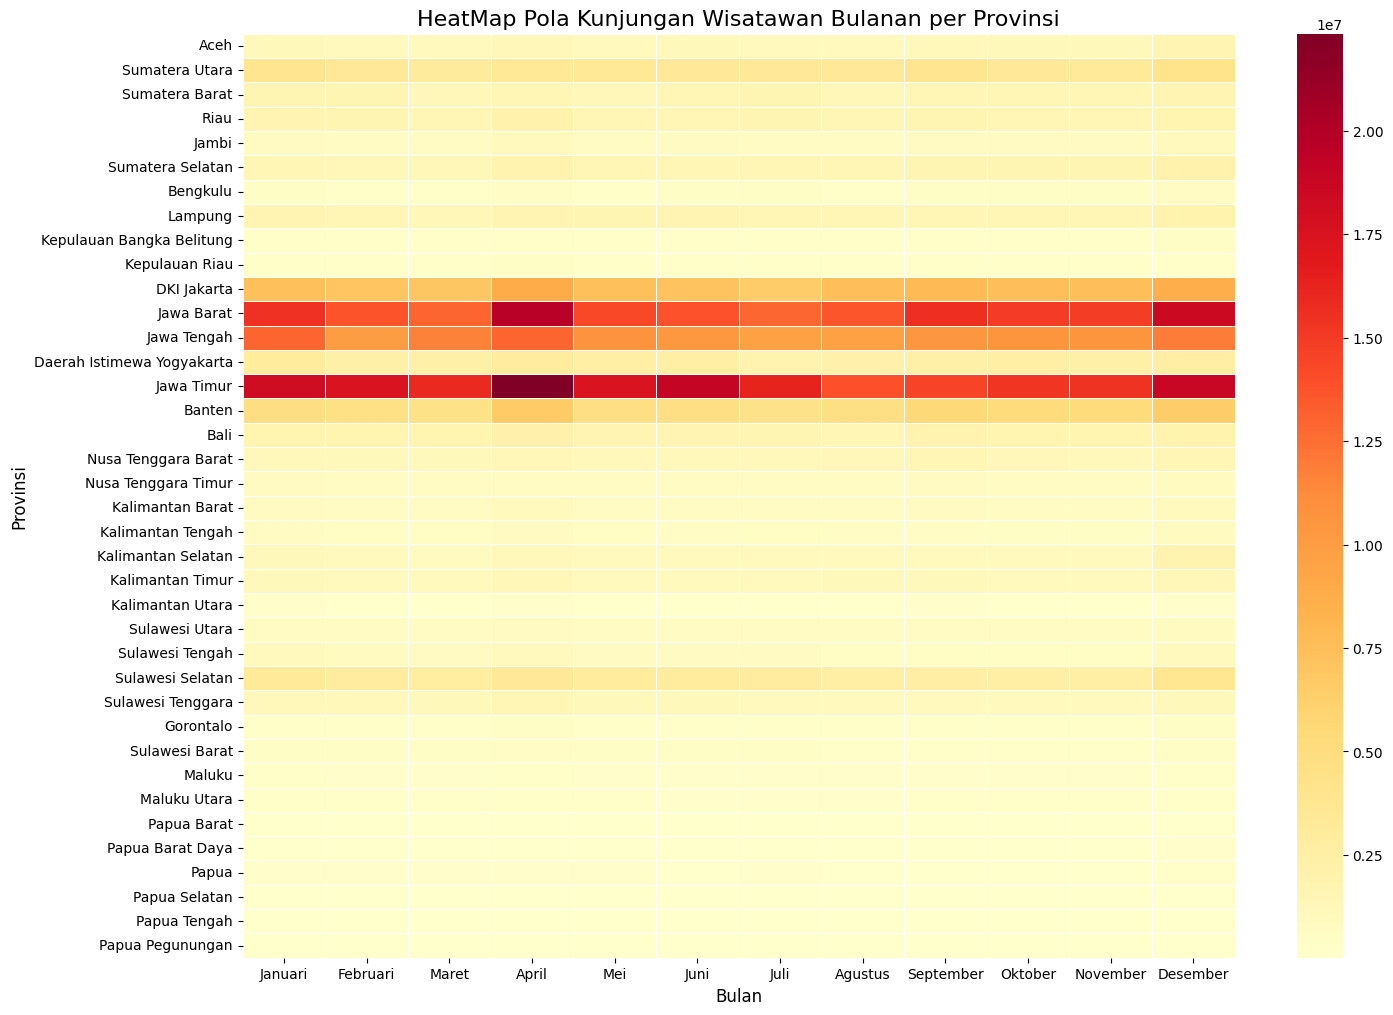

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

df_heatmap = df.set_index('Provinsi')

df_heatmap_bulanan = df_heatmap[['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']]

plt.figure(figsize=(16, 12))

sns.heatmap(
    df_heatmap_bulanan, 
    annot=False,  
    cmap='YlOrRd', 
    linewidths=.5
)

plt.title('HeatMap Pola Kunjungan Wisatawan Bulanan per Provinsi', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Provinsi', fontsize=12)

plt.show()

## Deployment


Konfigurasi token ngrok

In [66]:
!ngrok config add-authtoken 2yFrLHq9HZY1UnYURRAlKrIJGUh_3xvsbWbZ11EQSEcCa6HMW

Authtoken saved to configuration file: C:\Users\DELL\AppData\Local/ngrok/ngrok.yml


Konfigurasi Streamlit untuk dilakukan deployment

In [67]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

st.set_page_config(
    page_title="Dashboard Analisis Wisatawan Nusantara",
    page_icon="🏝️",
    layout="wide",
    initial_sidebar_state="expanded"
)

st.markdown("""
<style>
    .main-header {
        font-size: 2.5rem;
        color: #1f77b4;
        text-align: center;
        margin-bottom: 2rem;
    }
    .metric-card {
        background-color: #fffbe6 !important;  
        color: #222 !important;               
        font-size: 1.3rem;
        font-weight: bold;
        border-left: 4px solid #f7b731;
        margin-bottom: 1rem;
    }
    .cluster-info {
           background-color: #e8f4fd;
           color: #111 !important;
           padding: 1rem;
           border-radius: 0.5rem;
           margin: 1rem 0;
    }
</style>
""", unsafe_allow_html=True)

@st.cache_data
def load_data():
    """Load and cache the dataset"""
    try:
        df = pd.read_csv('dataset.csv')
        
        if 'Bulan13' not in df.columns:
            df['Bulan13'] = np.nan
            df.to_csv('dataset.csv', index=False)
            st.sidebar.success("✅ Kolom 'Bulan13' berhasil ditambahkan ke dataset!")
        
        return df
    except FileNotFoundError:
        st.error("File dataset.csv tidak ditemukan! Pastikan file berada di direktori yang sama dengan app.py")
        return None

@st.cache_resource
def train_clustering_model(df):
    """Train K-Means clustering model"""
    columns_to_drop = ['Provinsi']
    if 'Bulan13' in df.columns:
        columns_to_drop.append('Bulan13')
    
    features = df.drop(columns_to_drop, axis=1)
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)
    
    kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(features_scaled)
    
    return kmeans, scaler, cluster_labels

@st.cache_resource
def train_classification_model(df):
    """Train Logistic Regression model"""
    bins = [0, 10000000, 50000000, df['Tahunan'].max()]
    labels = ['Rendah', 'Sedang', 'Tinggi']
    df['Kategori_Kunjungan'] = pd.cut(df['Tahunan'], bins=bins, labels=labels, include_lowest=True)
    
    columns_to_drop = ['Provinsi', 'Tahunan', 'Kategori_Kunjungan']
    if 'Bulan13' in df.columns:
        columns_to_drop.append('Bulan13')
    
    X = df.drop(columns_to_drop, axis=1)
    y = df['Kategori_Kunjungan']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    logreg_model = LogisticRegression(max_iter=1000, random_state=42)
    logreg_model.fit(X_train, y_train)
    
    return logreg_model, X_test, y_test

def predict_bulan13_model(df):
    if 'Bulan13' not in df.columns:
        return None, None
    
    if df['Bulan13'].notna().sum() > 0:
        X = df[['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']]
        y = df['Bulan13'].dropna()  
        X = X.loc[y.index]  
        
        if len(y) > 0:
            model = LinearRegression()
            model.fit(X, y)
            return model, X.columns.tolist(), 'actual'
    

    monthly_cols = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                   'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

    monthly_avg = df[monthly_cols].mean()
    np.random.seed(42) 
    synthetic_bulan13 = monthly_avg.mean() * (0.8 + 0.4 * np.random.rand(len(df)))
    
    X = df[monthly_cols]
    y = synthetic_bulan13
    
    model = LinearRegression()
    model.fit(X, y)
    return model, monthly_cols, 'dummy'

def main():

    st.markdown('<h1 class="main-header">🏝️ Dashboard Analisis Wisatawan Nusantara</h1>', unsafe_allow_html=True)
    st.markdown("### Segmentasi Provinsi & Prediksi Kategori Kunjungan")
    

    df = load_data()
    if df is None:
        return

    st.sidebar.title("📊 Menu Navigasi")
    page = st.sidebar.selectbox(
        "Pilih Halaman:",
        ["🏠 Dashboard Utama", "📈 Data Overview", "🎯 Clustering Analysis", "🔮 Prediction Model", "📅 Prediksi Bulan ke-13", "📊 Visualizations"]
    )
    
    if page == "🏠 Dashboard Utama":
        show_dashboard(df)
    elif page == "📈 Data Overview":
        show_data_overview(df)
    elif page == "🎯 Clustering Analysis":
        show_clustering_analysis(df)
    elif page == "🔮 Prediction Model":
        show_prediction_model(df)
    elif page == "📅 Prediksi Bulan ke-13":
        show_predict_bulan13(df)
    elif page == "📊 Visualizations":
        show_visualizations(df)

def show_dashboard(df):
    """Main dashboard page"""
    st.markdown("## 📊 Dashboard Utama")
    

    col1, col2, col3, col4 = st.columns(4)
    
    with col1:
        st.metric("Total Provinsi", len(df))
    
    with col2:
        st.metric("Total Kunjungan Tahunan", f"{df['Tahunan'].sum():,}")
    
    with col3:
        st.metric("Rata-rata Kunjungan", f"{df['Tahunan'].mean():,.0f}")
    
    with col4:
        st.metric("Provinsi Tertinggi", df.loc[df['Tahunan'].idxmax(), 'Provinsi'])
    
    st.markdown("### 🏆 Top 10 Provinsi dengan Kunjungan Tertinggi")
    
    top_10 = df.nlargest(10, 'Tahunan')
    fig = px.bar(
        top_10, 
        x='Provinsi', 
        y='Tahunan',
        title="Top 10 Provinsi dengan Kunjungan Tertinggi",
        color='Tahunan',
        color_continuous_scale='viridis'
    )
    fig.update_layout(xaxis_tickangle=-45)
    st.plotly_chart(fig, use_container_width=True)
    
    st.markdown("### 📅 Pola Kunjungan Bulanan")
    
    monthly_data = df[['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                      'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']].mean()
    
    fig = px.line(
        x=monthly_data.index,
        y=monthly_data.values,
        title="Rata-rata Kunjungan Bulanan",
        markers=True
    )
    fig.update_layout(xaxis_title="Bulan", yaxis_title="Rata-rata Kunjungan")
    st.plotly_chart(fig, use_container_width=True)

def show_data_overview(df):
    """Data overview page"""
    st.markdown("## 📈 Data Overview")
    
    col1, col2 = st.columns(2)
    
    with col1:
        st.markdown("### 📋 Informasi Dataset")
        st.write(f"**Jumlah Baris:** {len(df)}")
        st.write(f"**Jumlah Kolom:** {len(df.columns)}")
        st.write(f"**Ukuran Dataset:** {df.shape}")
        
        st.markdown("### 🔧 Tipe Data")
        st.dataframe(df.dtypes.to_frame('Tipe Data'))
    
    with col2:
        st.markdown("### 📊 Statistik Deskriptif")
        st.dataframe(df.describe())
    
    st.markdown("### ❓ Missing Values")
    missing_data = df.isnull().sum()
    if missing_data.sum() == 0:
        st.success("✅ Tidak ada missing values dalam dataset!")
    else:
        st.warning("⚠️ Terdapat missing values:")
        st.dataframe(missing_data[missing_data > 0])
    
    st.markdown("### 📄 Data Mentah")
    st.dataframe(df)

def show_clustering_analysis(df):
    """Clustering analysis page"""
    st.markdown("## 🎯 Analisis Clustering (K-Means)")
    
    kmeans, scaler, cluster_labels = train_clustering_model(df)
    df_clustered = df.copy()
    df_clustered['Cluster'] = cluster_labels
    
    st.markdown("### 🎨 Hasil Clustering")
    
    col1, col2 = st.columns(2)
    
    with col1:
        st.markdown("#### 📊 Distribusi Cluster")
        cluster_counts = df_clustered['Cluster'].value_counts().sort_index()
        fig = px.pie(
            values=cluster_counts.values,
            names=[f'Cluster {i}' for i in cluster_counts.index],
            title="Distribusi Provinsi per Cluster"
        )
        st.plotly_chart(fig, use_container_width=True)
    
    with col2:
        st.markdown("#### 📈 Statistik per Cluster")
        cluster_stats = df_clustered.groupby('Cluster')['Tahunan'].agg(['mean', 'min', 'max', 'count'])
        cluster_stats.columns = ['Rata-rata', 'Minimum', 'Maksimum', 'Jumlah Provinsi']
        st.dataframe(cluster_stats)
    
    st.markdown("### 🔍 Detail Provinsi per Cluster")
    
    for cluster_id in sorted(df_clustered['Cluster'].unique()):
        cluster_provinces = df_clustered[df_clustered['Cluster'] == cluster_id]['Provinsi'].tolist()
        st.markdown(f"""
        <div class="cluster-info">
        <h4>Cluster {cluster_id}</h4>
        <p><strong>Jumlah Provinsi:</strong> {len(cluster_provinces)}</p>
        <p><strong>Provinsi:</strong> {', '.join(cluster_provinces)}</p>
        </div>
        """, unsafe_allow_html=True)
    
    st.markdown("### 📊 Visualisasi Cluster")
    
    monthly_cols = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                   'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
    
    cluster_monthly = df_clustered.groupby('Cluster')[monthly_cols].mean()
    
    fig = go.Figure()
    for cluster_id in cluster_monthly.index:
        fig.add_trace(go.Scatter(
            x=monthly_cols,
            y=cluster_monthly.loc[cluster_id],
            mode='lines+markers',
            name=f'Cluster {cluster_id}',
            line=dict(width=3)
        ))
    
    fig.update_layout(
        title="Pola Kunjungan Bulanan per Cluster",
        xaxis_title="Bulan",
        yaxis_title="Rata-rata Kunjungan",
        xaxis_tickangle=-45
    )
    st.plotly_chart(fig, use_container_width=True)

def show_prediction_model(df):
    """Prediction model page"""
    st.markdown("## 🔮 Model Prediksi Kategori Kunjungan")
    
    if 'Kategori_Kunjungan' not in df.columns:
        bins = [0, 10000000, 50000000, df['Tahunan'].max()]
        labels = ['Rendah', 'Sedang', 'Tinggi']
        df['Kategori_Kunjungan'] = pd.cut(df['Tahunan'], bins=bins, labels=labels, include_lowest=True)
    
    logreg_model, X_test, y_test = train_classification_model(df)
    
    st.markdown("### 📊 Performa Model")
    
    y_pred = logreg_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    col1, col2, col3 = st.columns(3)
    
    with col1:
        st.metric("Akurasi Model", f"{accuracy:.2%}")
    
    with col2:
        st.metric("Jumlah Data Test", len(X_test))
    
    with col3:
        st.metric("Jumlah Kategori", len(df['Kategori_Kunjungan'].unique()))
    

    st.markdown("### 📋 Laporan Klasifikasi")
    class_report = classification_report(y_test, y_pred, output_dict=True)
    report_df = pd.DataFrame(class_report).transpose()
    st.dataframe(report_df)
    

    st.markdown("### 🎯 Confusion Matrix")
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    fig = px.imshow(
        conf_matrix,
        text_auto=True,
        aspect="auto",
        title="Confusion Matrix",
        labels=dict(x="Predicted", y="Actual", color="Count"),
        x=['Rendah', 'Sedang', 'Tinggi'],
        y=['Rendah', 'Sedang', 'Tinggi']
    )
    st.plotly_chart(fig, use_container_width=True)
    

    st.markdown("### 🔮 Prediksi Kategori Kunjungan")
    st.markdown("Masukkan data bulanan untuk memprediksi kategori kunjungan:")
    
    col1, col2, col3 = st.columns(3)
    
    with col1:
        januari = st.number_input("Januari", min_value=0, value=1000000)
        februari = st.number_input("Februari", min_value=0, value=1000000)
        maret = st.number_input("Maret", min_value=0, value=1000000)
        april = st.number_input("April", min_value=0, value=1000000)
    
    with col2:
        mei = st.number_input("Mei", min_value=0, value=1000000)
        juni = st.number_input("Juni", min_value=0, value=1000000)
        juli = st.number_input("Juli", min_value=0, value=1000000)
        agustus = st.number_input("Agustus", min_value=0, value=1000000)
    
    with col3:
        september = st.number_input("September", min_value=0, value=1000000)
        oktober = st.number_input("Oktober", min_value=0, value=1000000)
        november = st.number_input("November", min_value=0, value=1000000)
        desember = st.number_input("Desember", min_value=0, value=1000000)
    
    if st.button("🔮 Prediksi Kategori"):

        input_data = np.array([januari, februari, maret, april, mei, juni, 
                              juli, agustus, september, oktober, november, desember]).reshape(1, -1)
        

        prediction = logreg_model.predict(input_data)[0]
        probability = logreg_model.predict_proba(input_data)[0]
        
        st.markdown("### 📊 Hasil Prediksi")
        
        col1, col2 = st.columns(2)
        
        with col1:
            st.markdown(f"""
            <div class="metric-card">
            <h3>Kategori Prediksi: {prediction}</h3>
            </div>
            """, unsafe_allow_html=True)
        
        with col2:
            st.markdown("**Probabilitas per Kategori:**")
            categories = ['Rendah', 'Sedang', 'Tinggi']
            for cat, prob in zip(categories, probability):
                st.write(f"{cat}: {prob:.2%}")

def show_predict_bulan13(df):
    st.markdown("## 📅 Prediksi Bulan ke-13 (Regresi)")
    st.markdown("Masukkan data 12 bulan untuk memprediksi nilai bulan ke-13 menggunakan Linear Regression.")

    model, bulan_cols, data_type = predict_bulan13_model(df)
    if model is None:
        st.warning("Dataset tidak memiliki kolom 'Bulan13'. Contoh dummy akan digunakan.")
        bulan_cols = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                     'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
        model = LinearRegression()
        # Dummy fit
        X_dummy = np.arange(1, 13).reshape(1, -1)
        y_dummy = np.array([100])
        model.fit(X_dummy, y_dummy)
        data_type = 'dummy'


    if data_type == 'actual':
        st.success("✅ Model dilatih dengan data aktual dari kolom Bulan13")
    else:
        st.info("ℹ️ Model menggunakan data sintetis untuk demonstrasi (kolom Bulan13 kosong)")


    st.markdown("### Input Data Bulanan")
    cols = st.columns(4)
    input_vals = []
    for i, bulan in enumerate(bulan_cols):
        val = cols[i % 4].number_input(bulan, min_value=0, value=1000000)
        input_vals.append(val)

    if st.button("🔮 Prediksi Bulan ke-13"):
        input_array = np.array(input_vals).reshape(1, -1)
        pred = model.predict(input_array)[0]
        
        st.markdown(f"""
        <div class="metric-card">
        <h3>Prediksi Bulan ke-13: <span style='color:#d35400'>{pred:,.0f}</span></h3>
        </div>
        """, unsafe_allow_html=True)
        

        if data_type == 'actual':
            st.markdown("""
            <div style='margin-top:10px; font-size:1.1rem; color:#333;'>
            <b>✅ Model Aktual:</b> <br>
            Prediksi di atas adalah hasil regresi yang dilatih dengan data aktual dari kolom Bulan13.<br>
            Model mempelajari pola dari data historis untuk memprediksi bulan ke-13.<br>
            </div>
            """, unsafe_allow_html=True)
        else:
            st.markdown("""
            <div style='margin-top:10px; font-size:1.1rem; color:#333;'>
            <b>ℹ️ Model Demonstrasi:</b> <br>
            Prediksi di atas adalah hasil regresi menggunakan data sintetis.<br>
            Kolom Bulan13 saat ini kosong, sehingga model menggunakan pola data bulanan yang ada.<br>
            <b>Untuk hasil yang akurat:</b> Isi kolom Bulan13 dengan data aktual (misal: data Januari tahun berikutnya).<br>
            </div>
            """, unsafe_allow_html=True)
        

        st.markdown("### 📊 Statistik Input")
        col1, col2, col3 = st.columns(3)
        with col1:
            st.metric("Total Input", f"{sum(input_vals):,}")
        with col2:
            st.metric("Rata-rata Bulanan", f"{np.mean(input_vals):,.0f}")
        with col3:
            st.metric("Bulan Tertinggi", f"{max(input_vals):,}")
        

        st.markdown("### 📈 Grafik Input Bulanan")
        input_df = pd.DataFrame({
            'Bulan': bulan_cols,
            'Jumlah': input_vals
        })
        
        fig = px.bar(
            input_df,
            x='Bulan',
            y='Jumlah',
            title="Data Input Bulanan",
            color='Jumlah',
            color_continuous_scale='viridis'
        )
        fig.update_layout(xaxis_tickangle=-45)
        st.plotly_chart(fig, use_container_width=True)

def show_visualizations(df):
    """Visualizations page"""
    st.markdown("## 📊 Visualisasi Data")
    
    viz_option = st.selectbox(
        "Pilih Visualisasi:",
        ["📈 Line Chart Tahunan", "🔥 Heatmap Bulanan", "📊 Box Plot per Bulan", "🎯 Scatter Plot"]
    )
    
    if viz_option == "📈 Line Chart Tahunan":
        st.markdown("### 📈 Jumlah Kunjungan Tahunan per Provinsi")
        
        fig = px.line(
            df, 
            x='Provinsi', 
            y='Tahunan',
            title="Jumlah Kunjungan Tahunan per Provinsi",
            markers=True
        )
        fig.update_layout(xaxis_tickangle=-45)
        st.plotly_chart(fig, use_container_width=True)
    
    elif viz_option == "🔥 Heatmap Bulanan":
        st.markdown("### 🔥 Heatmap Pola Kunjungan Bulanan")
        
        monthly_cols = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                       'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
        
        heatmap_data = df.set_index('Provinsi')[monthly_cols]
        
        fig = px.imshow(
            heatmap_data,
            title="Heatmap Pola Kunjungan Bulanan per Provinsi",
            aspect="auto",
            color_continuous_scale="YlOrRd"
        )
        fig.update_layout(
            xaxis_title="Bulan",
            yaxis_title="Provinsi"
        )
        st.plotly_chart(fig, use_container_width=True)
    
    elif viz_option == "📊 Box Plot per Bulan":
        st.markdown("### 📊 Distribusi Kunjungan per Bulan")
        
        monthly_cols = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 
                       'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
        
        fig = px.box(
            df[monthly_cols],
            title="Distribusi Kunjungan per Bulan"
        )
        fig.update_layout(xaxis_tickangle=-45)
        st.plotly_chart(fig, use_container_width=True)
    
    elif viz_option == "🎯 Scatter Plot":
        st.markdown("### 🎯 Scatter Plot: Bulan vs Bulan")
        
        col1, col2 = st.columns(2)
        
        with col1:
            x_month = st.selectbox("Pilih Bulan X:", ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni'])
        
        with col2:
            y_month = st.selectbox("Pilih Bulan Y:", ['Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'])
        
        fig = px.scatter(
            df,
            x=x_month,
            y=y_month,
            hover_data=['Provinsi'],
            title=f"Scatter Plot: {x_month} vs {y_month}",
            size='Tahunan',
            color='Tahunan',
            color_continuous_scale='viridis'
        )
        st.plotly_chart(fig, use_container_width=True)

if __name__ == "__main__":
    main() 

2025-06-16 22:06:40.018 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 22:06:40.019 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 22:06:40.021 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 22:06:40.023 No runtime found, using MemoryCacheStorageManager
2025-06-16 22:06:40.030 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 22:06:40.031 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 22:06:40.032 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 22:06:40.033 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-16 22:06:40.034 Thread 'MainThread':